### $\color{royalblue}{\text{ Šesta vježba iz numeričkih metoda u astronomiji (NMA), datum: 21.11.2024.}} $

### $\color{magenta}{\text{1. NUMERIČKA INTEGRACIJA - splajn & trapezni metod.}} $

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from Splajn_interpolacija import spline_interp, spline_integrate, inverse_interp

### 1.1.Gustina čvorova - razmatranje.
Potrebno je odrediti srednje rastojanje Saturna od Sunca trapeznom metodom i pomoću splajn interpolacije, te 

analizirati relativnu (apsolutnu) grešku u zavisnosti od gustine čvorova.

## $r_{sr}=\frac{1}{t_1-t_0} \int_{t_0}^{t_1}{rdt}$

Relativna greška trapezne metode u odnosu na splajn je -0.00854 %


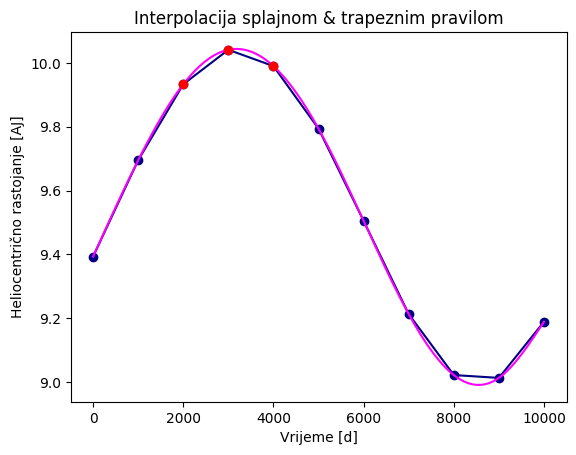

Relativna greška trapezne metode u odnosu na splajn za dio od 2000 do 4000 dana je -0.09952  %
Apsolutna greška trapezne metode u odnosu na splajn za dio od 2000 do 4000 dana je -1490571.0 km


In [83]:
plt.figure()
t,x,y,z = np.loadtxt('Saturn.dat', skiprows=2, delimiter=',', unpack=True)

n = 50 # mijenjati

t = t[0::n]
x = x[0::n]
y = y[0::n]
z = z[0::n]

r = np.sqrt(x**2+y**2+z**2)

# Trapezno pravilo

r_trapez=0
for i in range (len(r)-1):
    r_trapez+=(r[i+1]+r[i])*(t[i+1]-t[i])/2
r_trapez=r_trapez/(t[-1]-t[0])
    
# Splajn

r_splajn=spline_integrate(t,r,t[0],t[-1])
r_splajn=r_splajn/(t[-1]-t[0])

# Relativna greška

print('Relativna greška trapezne metode u odnosu \
na splajn je {} %'.format(np.round((r_trapez-r_splajn)/r_splajn*100,5)))

xx = np.linspace(t[0],t[-1],1000)
yy = spline_interp(t, r, xx)

plt.plot(t, r ,'-o', c='navy')
plt.plot(xx, yy, c='magenta')

# Uzimamo samo dio podataka jer se na cijelom intervalu greške kompenzuju!

r = r[t<=4000]
t = t[t<=4000]

r = r[t>=2000]
t = t[t>=2000]

plt.plot(t, r,'or')
plt.xlabel('Vrijeme [d]')
plt.ylabel('Heliocentrično rastojanje [AJ]')
plt.title('Interpolacija splajnom & trapeznim pravilom')
plt.show()

# za određeni interval

r_trapez=0
for i in range (len(r)-1):
    r_trapez+=(r[i+1]+r[i])*(t[i+1]-t[i])/2
r_trapez=r_trapez/(t[-1]-t[0])

r_splajn=spline_integrate(t,r,t[0],t[-1])
r_splajn=r_splajn/(t[-1]-t[0])

print('Relativna greška trapezne metode u odnosu \
na splajn za dio od 2000 do 4000 dana je {}  %'.format(np.round((r_trapez-r_splajn)/r_splajn*100,5)))

print('Apsolutna greška trapezne metode u odnosu \
na splajn za dio od 2000 do 4000 dana je {} km'.format(np.round((r_trapez-r_splajn)*149600000)))

### $\color{magenta}{\text{2. MONTE KARLO METODA.}} $

### 2.1. Generisanje slučajnog broja na proizvoljnom intervalu.

In [116]:
import random

x_01=random.random() # slučajni broj na intervalu [0,1)

b=7.56
x_0b = random.random()*b # slučajni broj na intervalu [0,b)

a = 3.2
x_ab = random.random()*(b-a) + a # slučajni broj na intervalu [a,b)

print('Slučajni broj na intervalu [0,1): {}'.format(x_01))
print('Slučajni broj na intervalu [0,{}): {}'.format(b, x_0b))
print('Slučajni broj na intervalu [{},{}): {}'.format(a, b, x_ab))

Slučajni broj na intervalu [0,1): 0.07921905246266236
Slučajni broj na intervalu [0,7.56): 6.992440446210765
Slučajni broj na intervalu [3.2,7.56): 4.520540373999003


### 2.2. Plankov zakon.

### $B(\lambda, T)=\frac{2hc^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda kT}}-1}$

Treba izračunati ukupnu količinu zračenja na intervalu talasnih dužina $[\lambda_1, \lambda_2]$.

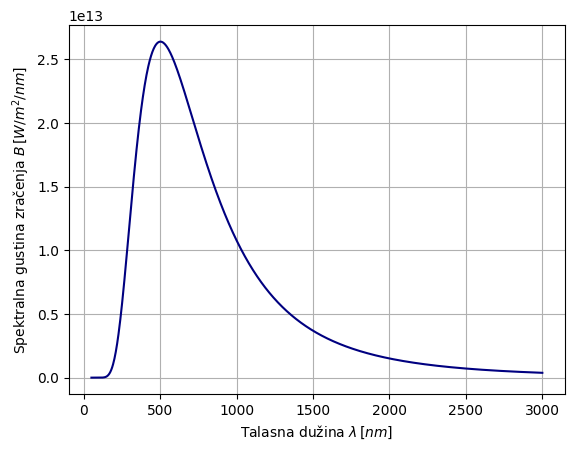

In [96]:
# konstante

c = 299792458.
h = 6.62607004e-34
e = np.exp(1)
k = 1.38064852e-23
t = 5778.

l = np.linspace(50e-9, 3000e-9, 1000) # talasna dužina [nm]

# formula

f = 2 * h * c**2/l**5/(np.exp(h * c/(l * k * t)) - 1)

plt.plot(l*1e9, f, color='navy')
plt.grid()
plt.xlabel(r'Talasna dužina $\lambda\,[nm]$') 
plt.ylabel(r'Spektralna gustina zračenja $B\,[W/m^2/nm]$')  
plt.show()

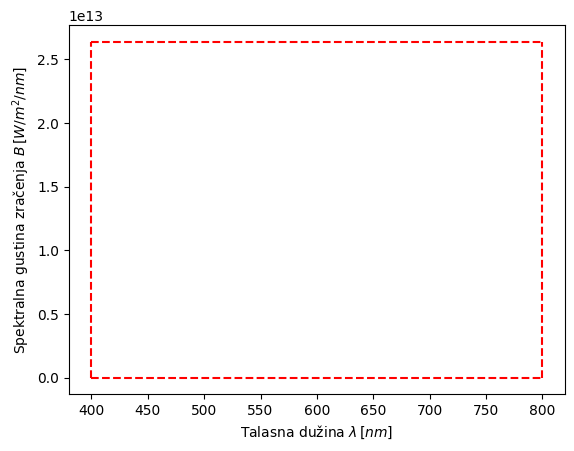

In [97]:
l1 = 400e-9
l2 = 800e-9

plt.plot([l1*1e9, l1*1e9], [0, np.max(f)], '--r')
plt.plot([l2*1e9, l2*1e9], [0, np.max(f)], '--r')
plt.plot([l1*1e9, l2*1e9], [np.max(f), np.max(f)], '--r')
plt.plot([l1*1e9, l2*1e9], [0, 0], '--r')
plt.xlabel(r'Talasna dužina $\lambda\,[nm]$') 
plt.ylabel(r'Spektralna gustina zračenja $B\,[W/m^2/nm]$')  
plt.show()

### 2.3. Pogodak ili promašaj (Hit or miss).
Generišemo $N(i)$ slučajnih tačaka unutar crvenog pravougaonika, pa računamo dalje...

[1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300
 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700
 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100
 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500
 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900
 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300
 9400 9500 9600 9700 9800 9900]


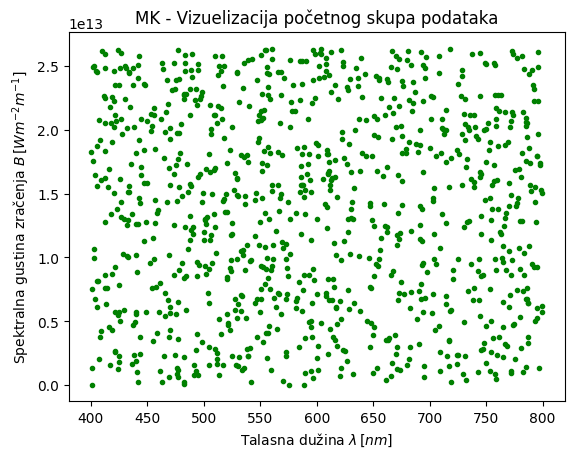

In [113]:
N = np.arange(1000, 10000, 100) # broj slučajnih tačaka (gađanja)
print(N)

hit_or_miss = np.zeros(len(N)) # inicijalizacija rezultata (pogodaka)
s = (l2-l1)*max(f) # aproksimacija površine pravougaonika

for i in range(len(N)):
  
    x = np.random.random(N[i])*(l2-l1)+l1 # nasumične talasne dužine
    y = np.random.random(N[i])*max(f) # nasumično B

    plank = 2 * h * c**2/x**5/(np.exp(h * c/(x * k * t)) - 1) # izračun funkcije za svako x
    
    # print(y<plank)

    hit = len(y[y<plank]) # broj tačaka ispod krive (pogoci)
    hit_or_miss[i] = hit/N[i] * s # površina ispod krive (integral)
    
    if i==0:
        plt.plot(x*1e9,y,'.g')
        plt.title('MK - Vizuelizacija početnog skupa podataka')
        plt.xlabel(r'Talasna dužina $\lambda\,[nm]$') 
        plt.ylabel(r'Spektralna gustina zračenja $B\,[Wm^{-2}m^{-1}]$')  

In [119]:
x = np.random.random(100)*100
print(x)

[60.10985129  0.5945305  64.70754454 41.40632776 15.00684653 58.85104715
 53.46371398 51.91443983 85.85781058 56.86864923 29.07946855 70.62038405
 80.72647644  9.69056606  1.96392018 81.25558103 51.10972164 19.40234035
 37.44075053 10.96232187 29.81988627 79.55799684 99.90550946 55.06210959
 46.91008239 76.97010307 67.33212829 91.32596603 83.83866831 12.50449789
 49.90982163 96.24211855 22.52695564 56.40183279  8.07938607 17.29853606
 39.66007662  3.09151938 89.32133859 69.70387466 97.2478879  48.83974937
 32.4788416  60.91405307 92.1445192  40.80059048 14.20561079 16.32473773
 57.46693997 36.98547817 14.97742283 59.85661647 61.62174475 99.18543268
 25.79557045 99.78247254 50.30486519 65.31819706 51.03183816 12.83225051
  4.10598585 29.65434193 51.80819476 38.14205729 84.32759879 59.65733661
 30.90197154 62.00103767 70.99762861 22.88173173 98.52358686 63.97793333
 84.25410078 11.89849467 94.78440156 11.51152398 45.75502413 63.83248868
  5.68381001 46.24112435 58.60935814 13.35413258 86

#### Mali recap (random primjer, nevezano za Plankovu krivu):
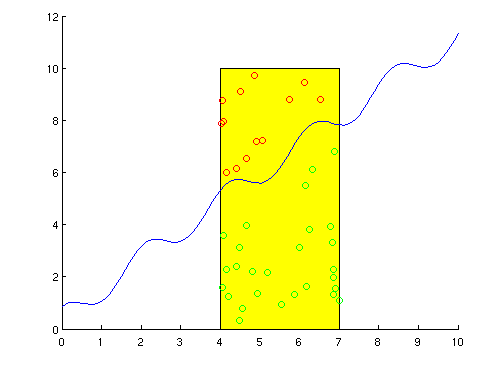

### 2.4. Prosječna vrijednost (Sample mean).

### $I\approx\frac{1}{N}\sum_{i=1}^N B(\lambda_i,T)(\lambda_2-\lambda_1)$

In [105]:
sample_mean=np.zeros(len(N)) # inicijalizacija rezultata (pogodaka)

for i in range(len(N)):
    
    x = np.random.random(N[i])*(l2-l1)+l1 # nasumične talasne dužine
    
    plank = 2 * h * c**2/x**5/(np.exp(h * c/(x * k * t)) - 1) # izračun funkcije za svako x

    # if i==0:
    #    plt.plot(x*1e9, plank,'or') 
    
    sample_mean[i]=np.mean(plank)*(l2-l1) # računamo integral
print(len(sample_mean))

100


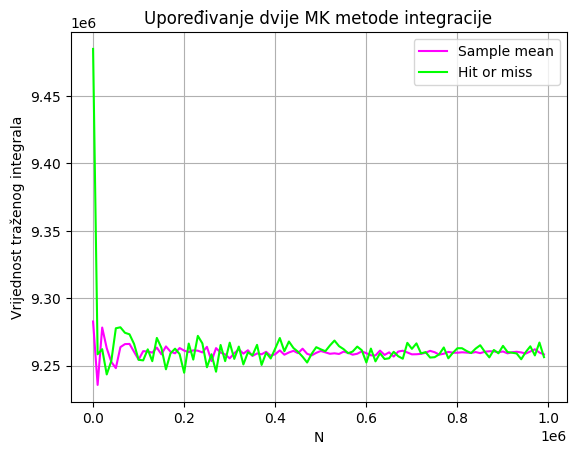

In [89]:
# Upoređivanje metoda

plt.plot(N, sample_mean, label = 'Sample mean', c='magenta')
plt.plot(N, hit_or_miss, label = 'Hit or miss', c='lime')
plt.xlabel(r'N')
plt.ylabel('Vrijednost traženog integrala')
plt.title('Upoređivanje dvije MK metode integracije')
plt.grid()
plt.legend()
plt.show()

### 2.5. Opet Splajn, zašto da ne.

In [90]:
integral_splajn = spline_integrate(l, f, l1, l2)
print('Ukupna iradijansa na intervalu talasnih dužina od \
{}m do {}m je {} W/m^2/nm.'.format(l1,l2,np.round(integral_splajn, 2)))

Ukupna iradijansa na intervalu talasnih dužina od 4e-07m do 8e-07m je 9224013.06 W/m^2/nm.


### 2.6. Zaključak:
Sample mean: Brže konvergira, jer direktno računa prosječnu vrijednost funkcije.

Hit or miss: Zavisi od tačnosti određivanja pogodaka ispod krive, što može biti sporije za veće domene i kompleksne funkcije.

Za naš primjer je Splajn metoda bolja jer nam je dobro poznata funkcija!

### $\color{magenta}{\text{3. INVERZNA INTERPOLACIJA.}} $

Potrebno je odrediti trenutak u kom se Saturn, dok se približava Suncu, nalazi na heliocentričnom rastojanju od $9.62\,AJ$.

Treba naći radijalnu brzinu i radijalno ubrzanje u ovom trenutku.

Trenuci u kojima Saturn ima heliocentrično rastojanje od 9.62 AU su: [ 742.27 5621.6 ]


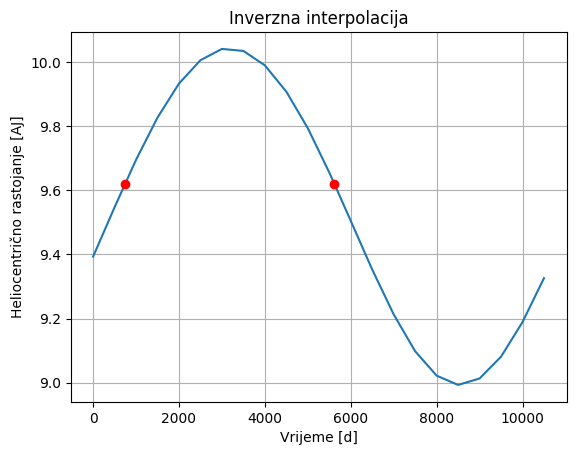

In [91]:
plt.figure()

t,x,y,z = np.loadtxt('Saturn.dat', skiprows=2, delimiter=',', unpack=True)

t = t[0::25]
x = x[0::25]
y = y[0::25]
z = z[0::25]

r = np.sqrt(x**2+y**2+z**2)

r0 = 9.62 # vrijednost za koju vršimo inverznu interpolaciju
r = np.sqrt(x**2+y**2+z**2) # heliocentrično rastojanje
t0 = inverse_interp(t, r, [r0])  #  inverzna interpolacija

print("Trenuci u kojima Saturn ima heliocentrično rastojanje od {} AU su: {}".format(r0, np.round(t0,2)))

plt.plot(t,r)
plt.plot(t0,np.ones(len(t0))*r0,'or')
plt.xlabel('Vrijeme [d]')
plt.ylabel('Heliocentrično rastojanje [AJ]')
plt.title('Inverzna interpolacija')
plt.grid()
plt.show() 

In [92]:
for i in range(len(t0)):
    if r[t<t0[i]][-1]>r[t>t0[i]][0]: 
        break

trazeni_trenutak=t0[i]
print("Traženi trenutak je {}".format(np.round(trazeni_trenutak,2)))

Traženi trenutak je 5621.6


In [93]:
vr=spline_der(t,r,[trazeni_trenutak],1)*1731.48  # šta je ovo 1731.48?
ar=spline_der(t,r,[trazeni_trenutak],2)*0.0200402 # šta je ovo 0.0200402?

print('Radijalna brzina u {} [d] je {} km/s'.format(np.round(trazeni_trenutak,2), np.round(vr[0],2)))
print('Radijalno ubrzanje u {} [d] je {} km/s²'.format(np.round(trazeni_trenutak,2), np.round(ar[0],10)))

Radijalna brzina u 5621.6 [d] je -0.52 km/s
Radijalno ubrzanje u 5621.6 [d] je -8e-10 km/s²


### $\color{green}{\text{ZADACI:}} $

#### 1.  Numeričkom integracijom odrediti srednju prividnu magnitudu asteroida Ryugu unutar
#### proizvoljnog intervala vremena.
<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

#### 2. Koristeći Hit or miss MK metodu, procijeniti broj zvijezda koje se nalaze u naseljivoj zoni
#### neke galaksije, koja ima približno $10^{11}$ zvijezda. One su raspoređene uniformno unutar 
#### diska galaksije čiji je radijus $15\,kpc$ i debljina $1\,kpc$. Naseljiva zona je toroidalnog oblika
#### sa unutrašnjim radijusom od $2.5\,kpc$ i spoljašnjim radijusom od $10\,kpc$. "Naseljive zvijezde"
#### su one koje su dugovječne i stabilne, što čini $8\%$ ukupnog broja zvijezda od naseljive zone.

### $\color{green}{\text{RJEŠENJA:}} $